# Most Streamed Spotify Songs 2023

The dataset was obtained from the Kaggle website.

## Import required libraries and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown

In [5]:
# Get the dataset
# https://drive.google.com/file/d/18CaLFN0gglTxBRrx_bHwO0VfO_o3iyhZ/view?usp=sharing
file_id = "18CaLFN0gglTxBRrx_bHwO0VfO_o3iyhZ"
url = f"https://drive.google.com/uc?id={file_id}"
output = "spotify_data.csv"

gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output, encoding='cp1251')
df.head()

Downloading...
From: https://drive.google.com/uc?id=18CaLFN0gglTxBRrx_bHwO0VfO_o3iyhZ
To: /content/spotify_data.csv
100%|██████████| 106k/106k [00:00<00:00, 3.47MB/s]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Data Cleaning

In [7]:
df['release_date'] = pd.to_datetime(
    df[['released_year', 'released_month', 'released_day']].rename(
        columns={'released_year': 'year', 'released_month': 'month', 'released_day': 'day'}
    )
)

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [8]:
df['key'] = df['key'].fillna('Undefined')
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

non_numeric_indices = df[~df['streams'].str.isnumeric()].index
print("Indices of non-numeric rows:")
print(non_numeric_indices)

Indices of non-numeric rows:
Index([574], dtype='int64')


In [9]:
for idx in non_numeric_indices:
    df.loc[idx, 'streams'] = '0'

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
streams_mean=np.round(df['streams'].mean())
df.loc[574, 'streams'] = streams_mean
df['streams'][574]

np.int64(513597931)

In [10]:
df['streams_scaled'] = df['streams'] / 10000000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               953 non-null    int64         
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   953 non-null    object        
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

In [11]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [12]:
df.duplicated().sum()

np.int64(0)

## Statistic Visualization

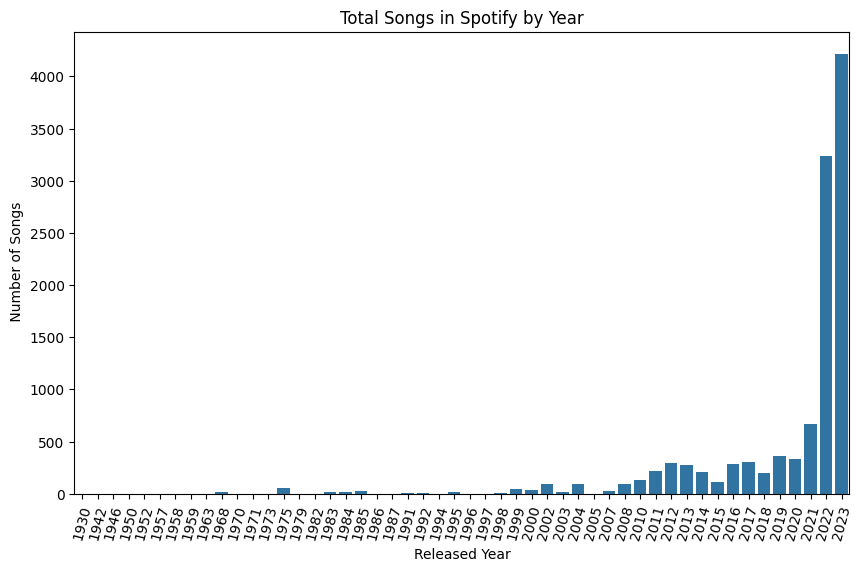

In [14]:
df_year = df.groupby('released_year')['in_spotify_charts'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_year, x='released_year', y='in_spotify_charts')
plt.xlabel('Released Year')
plt.ylabel(' Number of Songs')
plt.title('Total Songs in Spotify by Year')
plt.xticks(rotation=75)
plt.show()

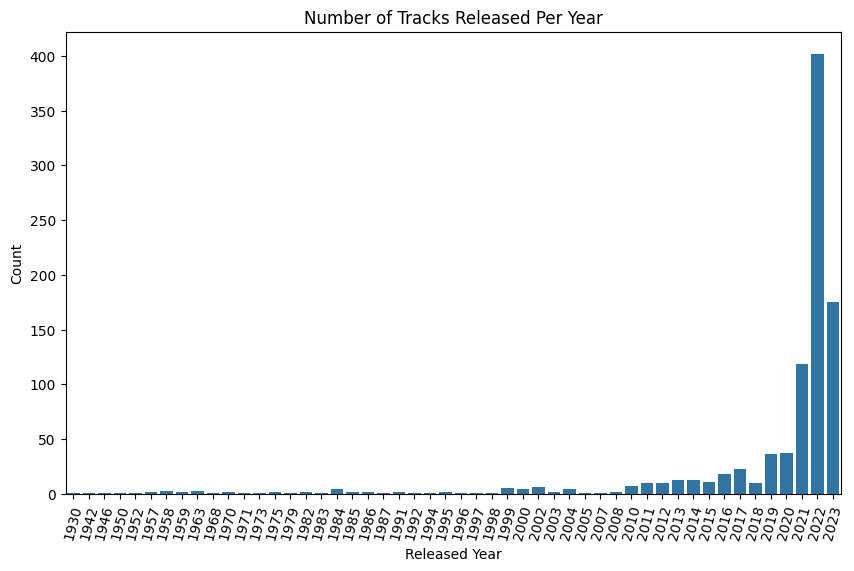

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='released_year')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.title('Number of Tracks Released Per Year')
plt.xticks(rotation=75)
plt.show()

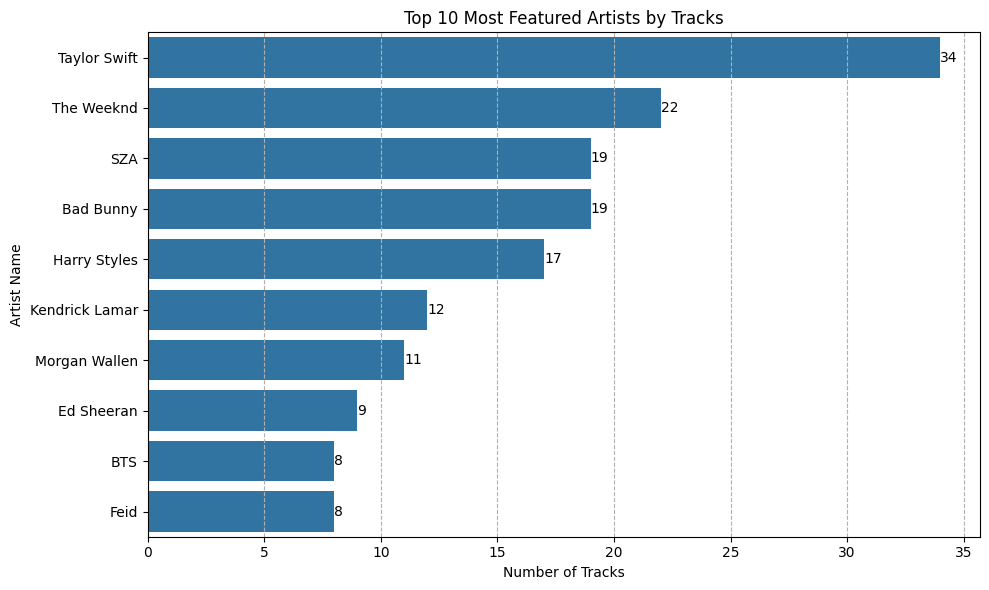

In [16]:
top_artists = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Most Featured Artists by Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
for index, value in enumerate(top_artists.values):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.grid(axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

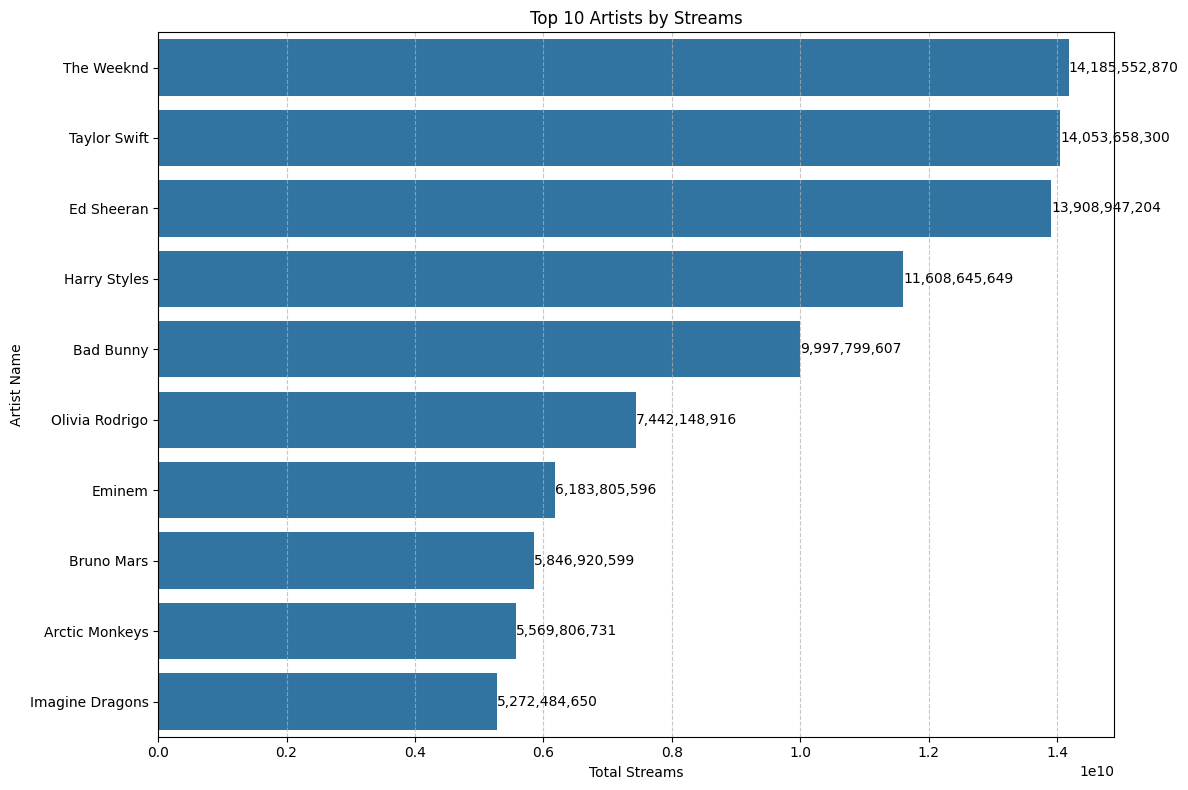

In [17]:
df_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='streams', y='artist(s)_name', data=df_streams)
plt.title('Top 10 Artists by Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist Name')
for index, value in enumerate(df_streams['streams']):
    plt.text(value, index, f'{value:,}', color='black', ha="left", va="center")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

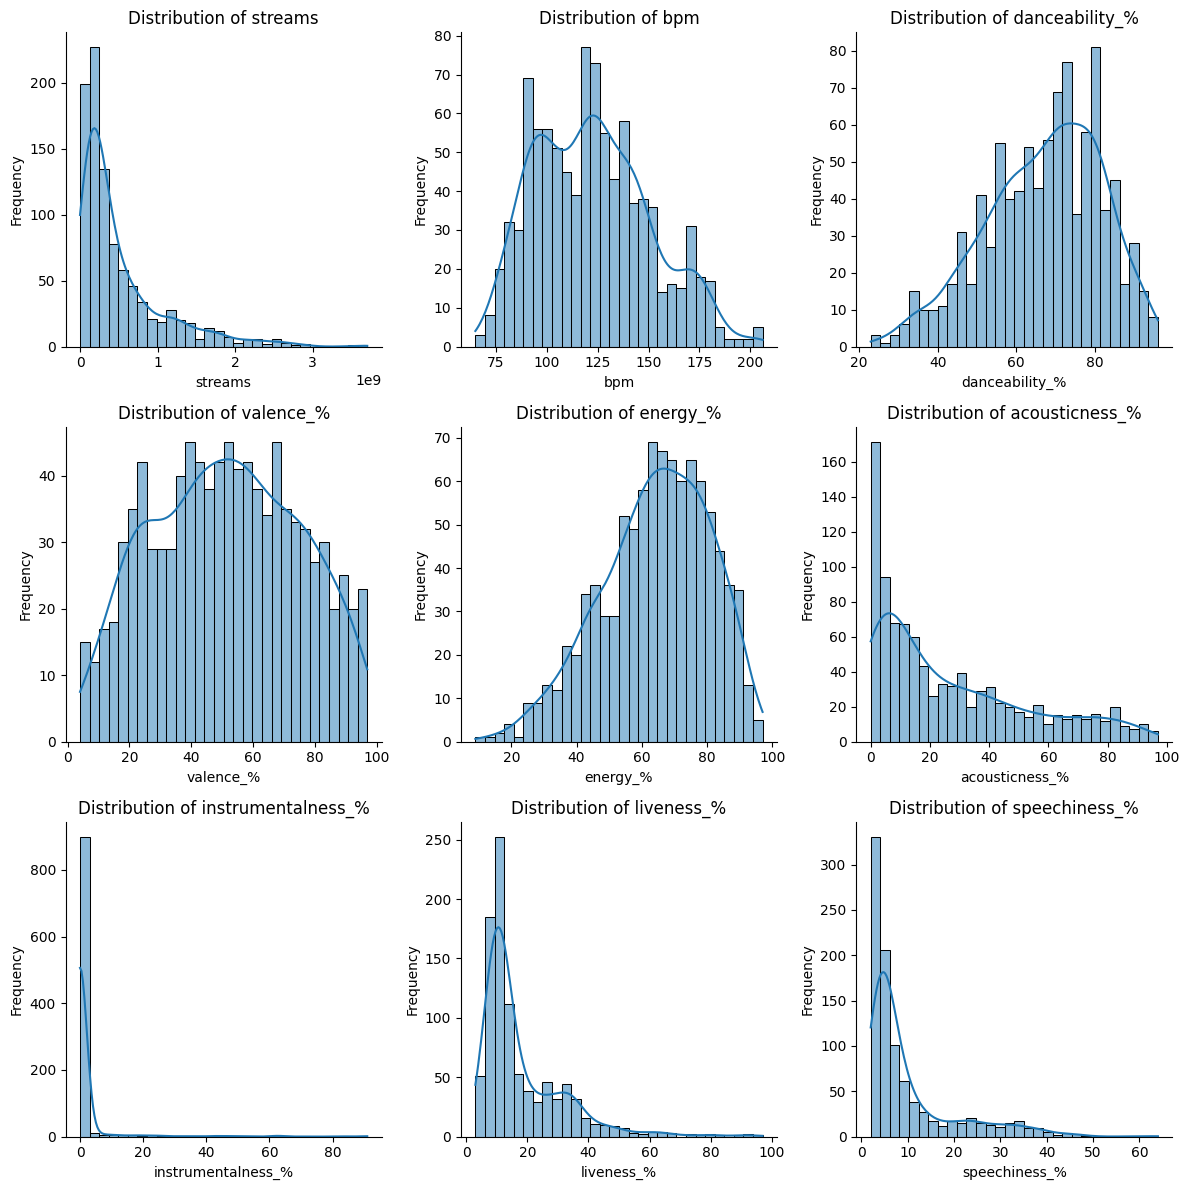

In [19]:
features = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
g = sns.FacetGrid(pd.melt(df, value_vars=features), col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', kde=True, bins=30)
for ax, feature in zip(g.axes.flat, features):
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [20]:
import gspread
from gspread_dataframe import set_with_dataframe
from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

spreadsheet = gc.create('spotify_df')
worksheet = spreadsheet.get_worksheet(0)

set_with_dataframe(worksheet, df)

spreadsheet.url

'https://docs.google.com/spreadsheets/d/1OjOW38H_CAGgtLh3JRtRV2ExGYNa3v2AAvqTGTlxT-k'